## Regression based on Iris dataset
We ll use the Iris dataset in the regression setup 
- not use the target variable (typicall classification case)
- use petal width (cm) as dependent variable using others as independent 

In [3]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


## Regression with Tree Classifier

In [7]:
independent_vars = ['sepal length (cm)','sepal width (cm)', 'petal length (cm)']
dependent_var = 'petal width (cm)'

X = df[independent_vars]
y = df[dependent_var]

from sklearn import tree
model = tree.DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [8]:
# get feature importances
importances = model.feature_importances_
pd.Series(importances, index=independent_vars)

sepal length (cm)    0.020756
sepal width (cm)     0.024170
petal length (cm)    0.955074
dtype: float64

## Score of Regression

Some evaluation metrics (like mean squared error) are naturally descending scores (the smallest score is best)
</br>
This is important to note, because some scores will be reported as negative that by definition can never be negative.
</br>
In order to keep this clear:
metrics which measure the distance between the model and the data, like metrics.mean_squared_error, 
are available as neg_mean_squared_error which return the negated value of the metric.

In [13]:
from sklearn import model_selection
results = model_selection.cross_val_score(tree.DecisionTreeRegressor(), X, y, cv=10, scoring='neg_mean_squared_error')
print("MSE: %.3f (%.3f)") % (results.mean(), results.std())

MSE: -0.059 (0.046)


## Regression Performance over tree depth

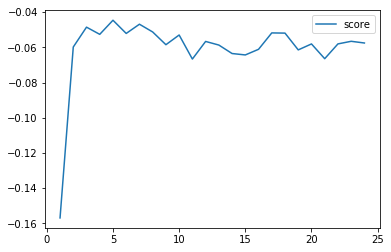

In [23]:
import matplotlib.pyplot as plt
from sklearn import model_selection
scores = []
depths = []
for depth in range(1, 25):  
    results = model_selection.cross_val_score(tree.DecisionTreeRegressor(max_depth = depth), X, y, cv=10, scoring='neg_mean_squared_error')
    scores.append(results.mean())
    depths.append(depth)

_ = pd.DataFrame(data = scores, index = depths, columns = ['score']).plot()

In [ ]:
# looks like a best depth around 